# Image Classification using CNN CIFAR10 Dataset 

Link to the Youtube tutorial video: https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=25

1) For the same epochs for training, the performance of CNN will be better than the one of ANN.
2) The computation of CNN is lower than ANN, because we are using max pooling layer to reduce the dimension
3) The CNN consists of 2 parts:
    1) 1st part: Stacks of convolutional, ReLU, and pooling layers for features extration
    2) 2nd part: ANN for classification tasks
4) ANN is a fully-connected dense network

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [24]:
# Load the CIFAR10 dataset into train and test sets respectively
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

print('The X_train consists of ' + str(X_train.shape[0]) + ' samples(images), while each sample(image) has dimension of ' + str(X_train.shape[1]) + ' x ' + str(X_train.shape[2]) + ' with ' + str(X_train.shape[3]) + ' color channels.')
print('The X_test consists of ' + str(X_test.shape[0]) + ' samples(images), while each sample(image) has dimension of ' + str(X_test.shape[1]) + ' x ' + str(X_test.shape[2]) + ' with ' + str(X_test.shape[3]) + ' color channels.')

The X_train consists of 50000 samples(images), while each sample(image) has dimension of 32 x 32 with 3 color channels.
The X_test consists of 10000 samples(images), while each sample(image) has dimension of 32 x 32 with 3 color channels.


# Data Exploration

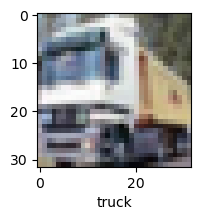

In [25]:
# Create a variable that contains all unique class names (ground truths) of the dataset [the class names are according to CIFAR10 dataset official repository] 
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"] 
            
# The Y_train is a 2D array
Y_train[:5]

# Convert the Y_train from 2D array into 1D array
Y_train = Y_train.reshape(-1,) 

# Convert the Y_test from 2D array into 1D array
Y_test = Y_test.reshape(-1,) 
    
# Self-define a function to visualize the information of a sample in the train set
def plot_sample(x_train, y_train, index):
    # Control the image size
    plt.figure(figsize=(15,2)) 
    # Show the 2nd sample in the train set
    plt.imshow(X_train[index]) 
    plt.xlabel(classes[y_train[index]]) 
   
# Show the information of the 2nd sample of the train set
plot_sample(X_train, Y_train, 1)

# Data Preprocessing

## Data Scaling

In [26]:
# Normalize all the features to the scale of range between 0 and 1, by dividing 255 (because each color channel of a pixel has the maximum value of 255)\n",
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Show the features of a sample in train set\n",
print(X_train_scaled[1])

[[[0.60392157 0.69411765 0.73333333]
  [0.49411765 0.5372549  0.53333333]
  [0.41176471 0.40784314 0.37254902]
  ...
  [0.35686275 0.37254902 0.27843137]
  [0.34117647 0.35294118 0.27843137]
  [0.30980392 0.31764706 0.2745098 ]]

 [[0.54901961 0.62745098 0.6627451 ]
  [0.56862745 0.6        0.60392157]
  [0.49019608 0.49019608 0.4627451 ]
  ...
  [0.37647059 0.38823529 0.30588235]
  [0.30196078 0.31372549 0.24313725]
  [0.27843137 0.28627451 0.23921569]]

 [[0.54901961 0.60784314 0.64313725]
  [0.54509804 0.57254902 0.58431373]
  [0.45098039 0.45098039 0.43921569]
  ...
  [0.30980392 0.32156863 0.25098039]
  [0.26666667 0.2745098  0.21568627]
  [0.2627451  0.27058824 0.21568627]]

 ...

 [[0.68627451 0.65490196 0.65098039]
  [0.61176471 0.60392157 0.62745098]
  [0.60392157 0.62745098 0.66666667]
  ...
  [0.16470588 0.13333333 0.14117647]
  [0.23921569 0.20784314 0.22352941]
  [0.36470588 0.3254902  0.35686275]]

 [[0.64705882 0.60392157 0.50196078]
  [0.61176471 0.59607843 0.50980392]


# Develop a machine learning model

## Develop the neural network (Artificial Neural Network, ANN)

1) The ANN directly takes the scaled features as the input to perform classification task  <br />
2) ANN is a fully-connected dense network
3) The guide to select the cost function type:  <br />
    <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
4) adam is the popular optimizer that gives good accuracy

In [27]:
# Develop the structure of the ANN (model)
ann = models.Sequential([
    # The flatten layer, that flattens each image of 32x32 dimension with 3 color channels into 1D array. Means each flatten image consists of 32*32*3=3072 features in 1D array before being input to the neural network.\n",
    layers.Flatten(input_shape=(32,32,3)),
    # The hidden layer (the 2nd layer/element of the neural network), which consists of 3000 neurons. ReLU activation function is preferred for hidden layer.\n",
    layers.Dense(3000, activation='relu'),
    # The hidden layer (the 3rdd layer/element of the neural network), which consists of 1000 neurons. ReLU activation function is preferred for hidden layer.\n",
    layers.Dense(1000, activation='relu'),
    # The output layer, which consists of 10 output neurons/units to classify all possible 10 class names. Sigmoid activation function is preferred for output layer.\n",
    layers.Dense(10, activation='sigmoid')
])

# Compile the ANN
ann.compile(
    optimizer='SGD', # stochastic gradient descent
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    
# Train the ANN\n",
ann.fit(X_train_scaled, Y_train, epochs=10)

c:\Users\weiyo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3051 - loss: 1.9307
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4170 - loss: 1.6520
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.4505 - loss: 1.5547
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4766 - loss: 1.4883
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4944 - loss: 1.4373
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5122 - loss: 1.3878
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.5233 - loss: 1.3564
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5391 - loss: 1.3147
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5512 - loss: 1.2845
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5600 - loss: 1.2564


In [28]:
# Evaluate the ANN using test set
ann.evaluate(X_test_scaled, Y_test)
 
# Insights:
# 1) The ANN has accuracy of 50% (Lower than the accuracy of the CNN below, at the same epochs)
# 2) For current own understanding, model.evaluate[0] + model.evaluate[1] not necessarily equals 1. Should explore why!! model.evaluate[0] is the loss. model.evaluate[1] is the score of the accuracy metric that you specify in model.compile().

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5031 - loss: 1.4087


[1.4067885875701904, 0.5009999871253967]

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
   
Y_predicted_ANN = ann.predict(X_test_scaled)
Y_predicted_classes_ANN = [np.argmax(element) for element in Y_predicted_ANN]
   
# Print the classification report of the ANN
print("Classification Report of the ANN:\n", classification_report(Y_test, Y_predicted_classes_ANN))
    
# Insights:
# 1) The ANN has accuracy of 50% (Lower than the accuracy of the CNN below, at the same epochs)"

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report of the ANN:
               precision    recall  f1-score   support

           0       0.42      0.76      0.54      1000
           1       0.64      0.66      0.65      1000
           2       0.53      0.18      0.27      1000
           3       0.42      0.24      0.30      1000
           4       0.49      0.39      0.43      1000
           5       0.45      0.40      0.42      1000
           6       0.52      0.64      0.57      1000
           7       0.47      0.65      0.55      1000
           8       0.77      0.41      0.54      1000
           9       0.48      0.68      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.52      0.50      0.48     10000
weighted avg       0.52      0.50      0.48     10000



### Explore the predicted results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Test set sample index 0 : Predicted class = cat ; Ground truth class = cat
Test set sample index 1 : Predicted class = truck ; Ground truth class = ship
Test set sample index 2 : Predicted class = airplane ; Ground truth class = ship
Test set sample index 3 : Predicted class = airplane ; Ground truth class = airplane
Test set sample index 4 : Predicted class = deer ; Ground truth class = frog


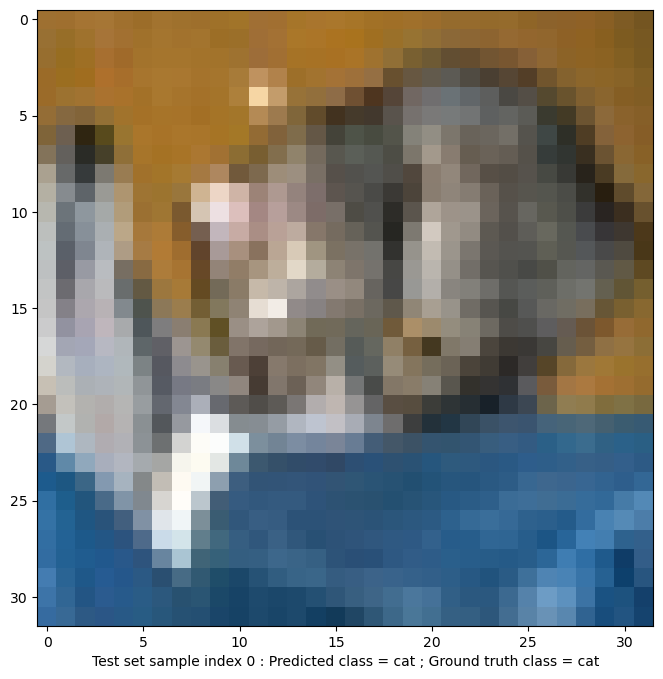

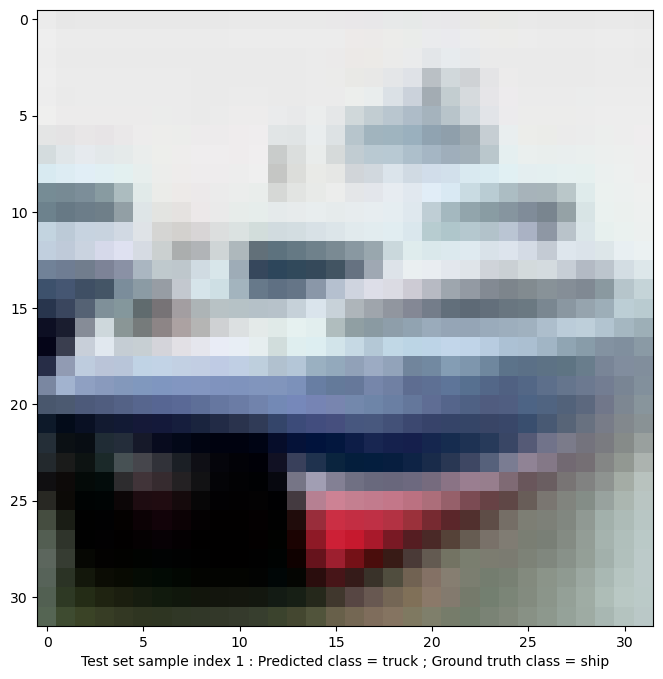

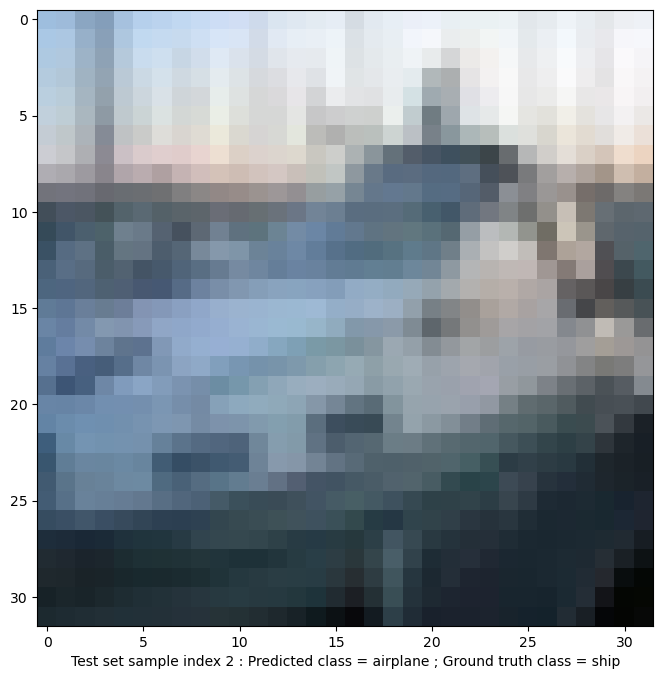

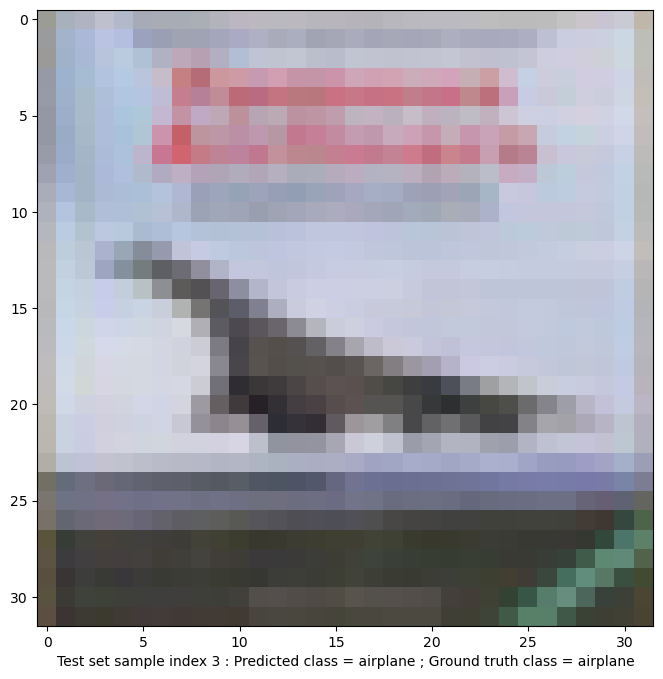

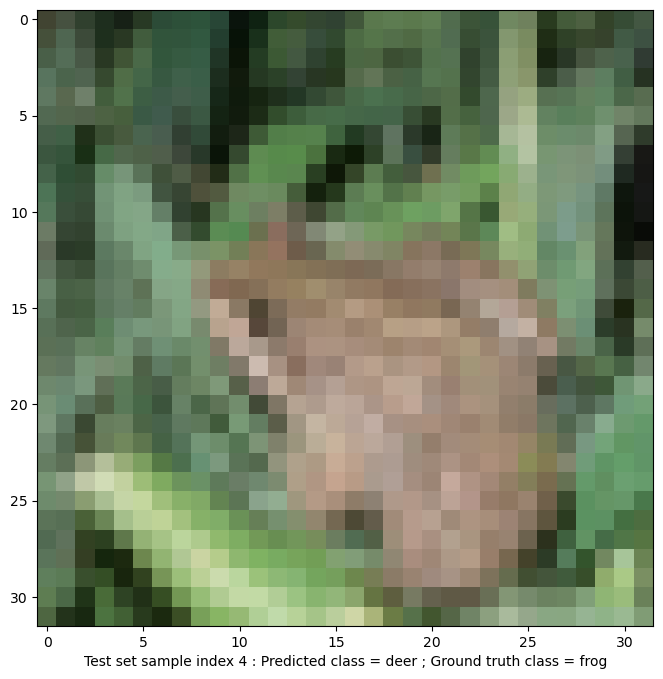

In [30]:
# Self-define a function to compare the predicted results of the neural network with the corresponding ground truth
def plot_predicted(model_name, x_test_scaled, x_test, y_test):
    j = 0
    Y_predicted_model = model_name.predict(x_test_scaled)
    Y_predicted_classes_model = [np.argmax(element) for element in Y_predicted_model]
    
    for i in Y_predicted_classes_model[:5]:
        # At each iteration, show the index, predicted class and ground truth class of a test set sample
        print('Test set sample index ' + str(j) + ' : Predicted class = ' + classes[i] + ' ; Ground truth class = ' + classes[y_test[j]])
        # Control the image size to (10 inches of width, 7 inches height)\n",
        plt.figure(figsize=(10,8))
        # Visualize the test set sample(image)
        plt.imshow(x_test[j])
        # Show the index and ground truth class of the test set sample as the xlabel of the figure window
        plt.xlabel('Test set sample index ' + str(j) + ' : Predicted class = ' + classes[i] + ' ; Ground truth class = ' + classes[y_test[j]])
        # Update the index (increase by 1 for each iteration)
        j += 1
   
# Compare the predicted results of the neural network (the model_name you provide) with the corresponding ground truth
plot_predicted(ann, X_test_scaled, X_test, Y_test)
    
# Insights:
# For the information in Y_predicted_model:
# Since the activation function of the output layer of the CNN is softmax, the predicted results of each image are actually the values of probability distribution between 0 and 1 (Class 0: Probability distribution 0, Class 1: Probability distribution 1, and vice versa).
# Means if the CNN has 10 possible classes to classify for an image, and the test set contains 10 samples, the predicted results returned by the model.predict() function contain (10 possible classes x 10 test set samples = 100 probability distribution = 10 (probability distribution)/(test set sample).
# The predicted class of an image is determined by finding out the class that has the maximum probability distribution (score) [use argmax() to find the index of maximum probability distribution, which represents the class that has the maximum probability distribution].

## Develop the neural network (Convolutional Neural Network, CNN)
    
1) The CNN consists of 2 parts:
    1) 1st part: Stacks of convolutional, ReLU, and pooling layers for features extration
    2) 2nd part: ANN for classification tasks
    3) <img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
2) The CNN directly takes the scaled features as the input to perform classification task  <br />
3) The difference between softmax and sigmoid is that softmax will normalize your probability
    1) EG: For a classification task whose unique class label (ground truth) is binary (either 0 or 1)
    2) Let's say at the output layer, the sigmoid function provides the results as: Class 0 = 0.45; Class 1 = 0.67. The sum of the result of each class not necessarily equals 1.
    3) If at that time you are using softmax instead of sigmoid function, the results will be: Class 0 = 0.45 / (0.45 + 0.67) = 0.40; Class 1 = 0.67 / (0.45 + 0.67) = 0.60. The sum of the result of each class equals 1 (0.4 + 0.6 = 1)
    
**The concept of CNN structure (EG: filter size of Convolutional layer & pooling layer, activation function, ...) involved in this tutorial is illustrated as below:**
    <img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    <img src="hidden\photo3.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    <img src="hidden\photo4.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [31]:
# Develop the structure of the CNN (model)
cnn = models.Sequential([
    # ----------Part 1: Stacks of convolutional, ReLU, and pooling layers for features extration-------------
     
    # **************1st stack**************
    # The 1st convolutional layer. The best thing about CNN is you don't need to tell CNN what the filters are. CNN will figure out the filters for you, you only need to tell the filter size and how many filters you want. 
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # \"filters=32\" means this convolutional layer has 32 filters (can detect 32 different features in the image). kernel_size=(3,3) means each of the 32 filters has size of 3x3 pixels. The activation function right after this convolutional layer is ReLU. Since this is the 1st convolutional layer of the CNN (2nd layer of the CNN), it requires input_shape parameter which represents the input layer (1st layer of the CNN). The input layer in front of this convolutional layer has shape of 32x32x3. 
    # The 1st pooling layer (max pooling) 
    layers.MaxPooling2D(2,2), # The filter (to perform max pooling operation) of this max pooling layer has size of 2x2 pixels 
    # **************2nd stack************** 
    # The 2nd convolutional layer. \"filters=64\" means this convolutional layer has 64 filters. kernel_size=(3,3) means each of the 32 filters has size of 3x3 pixels. The activation function right after this convolutional layer is ReLU. 
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
    # The 2nd pooling layer (max pooling) 
    layers.MaxPooling2D(2,2), # The filter (to perform max pooling operation) of this max pooling layer has size of 2x2 pixels\n",
    # The flatten layer, that flattens the feature maps provided by the last stack of convolutional, ReLU, and pooling layers in the Part 1 of CNN. Each feature map whose dimension is 32x32 pixels with 3 color channels is flatten into a 1D array. Means each flattened feature map consists of 32*32*3=3072 features in 1D array. If there are 2 flattened feature maps, with each having size of 32*32*3=3072 features in 1D array. Both flattened feature maps will be concatenated to create a new 1D array consisting 3072+3072=6144 features, before it is being input to the ANN. 
    layers.Flatten(), # You don't need to specify the shape if it is not the first layer, because the network can figure it out automatically 
   
    # ----------Part 2: ANN for classification tasks------------- 
    # The hidden(deep) layer, which consists of 64 neurons. ReLU activation function is preferred for hidden layer. 
    layers.Dense(64, activation='relu'), # To keep this tutorial simple, only 1 hidden layer is used, because the Part 1 of CNN would have done most of the work. So you don't need so many neurons and deep layers here. 
    # The output layer, which consists of 10 output neurons/units to classify all possible 10 class names. Softmax activation function is preferred for output layer. 
    layers.Dense(10, activation='softmax'),
]) 

# Compile the CNN 
cnn.compile(
    optimizer='SGD', # stochastic gradient descent
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
  
# Train the CNN 
cnn.fit(X_train_scaled, Y_train, epochs=10)

c:\Users\weiyo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1915 - loss: 2.1704
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.3947 - loss: 1.7014
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4724 - loss: 1.4762
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5278 - loss: 1.3393
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5681 - loss: 1.2329
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5968 - loss: 1.1566
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6191 - loss: 1.0890
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6384 - loss: 1.0360
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6524 - loss: 0.9943
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6703 - loss: 0.9541


In [32]:
# Evaluate the CNN using test set
cnn.evaluate(X_test_scaled, Y_test)
   
# Insights:
# 1) The CNN has accuracy of 63% (Higher than the accuracy of the ANN above, at the same epochs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6350 - loss: 1.0436


[1.0520868301391602, 0.6306999921798706]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
   
Y_predicted_CNN = cnn.predict(X_test_scaled)
Y_predicted_classes_CNN = [np.argmax(element) for element in Y_predicted_CNN]
    
# Print the classification report of the CNN
print("Classification Report of the CNN:\n", classification_report(Y_test, Y_predicted_classes_CNN))
    
# Insights:
# 1) The CNN has accuracy of 63% (Higher than the accuracy of the ANN above, at the same epochs)"

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report of the CNN:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      1000
           1       0.63      0.88      0.73      1000
           2       0.54      0.49      0.52      1000
           3       0.49      0.46      0.47      1000
           4       0.68      0.43      0.53      1000
           5       0.64      0.41      0.50      1000
           6       0.54      0.86      0.66      1000
           7       0.78      0.67      0.72      1000
           8       0.70      0.82      0.76      1000
           9       0.75      0.57      0.65      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000



### Explore the predicted results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test set sample index 0 : Predicted class = cat ; Ground truth class = cat
Test set sample index 1 : Predicted class = ship ; Ground truth class = ship
Test set sample index 2 : Predicted class = ship ; Ground truth class = ship
Test set sample index 3 : Predicted class = airplane ; Ground truth class = airplane
Test set sample index 4 : Predicted class = frog ; Ground truth class = frog


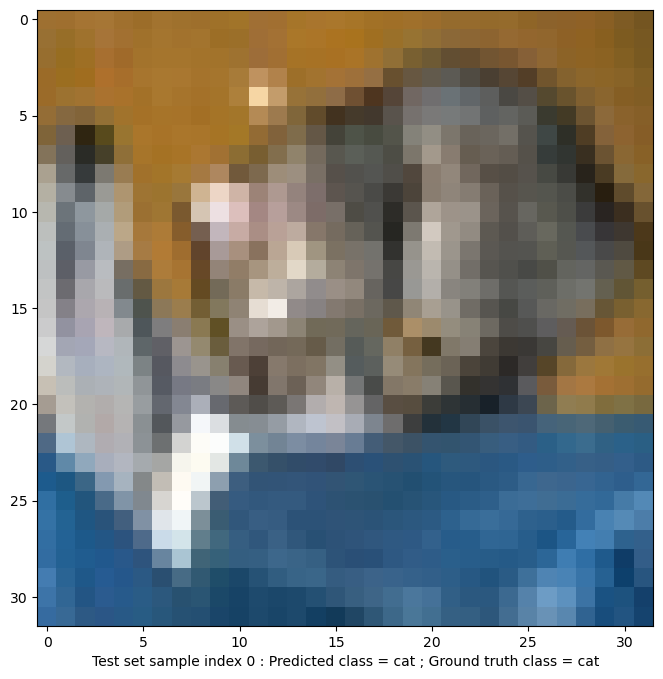

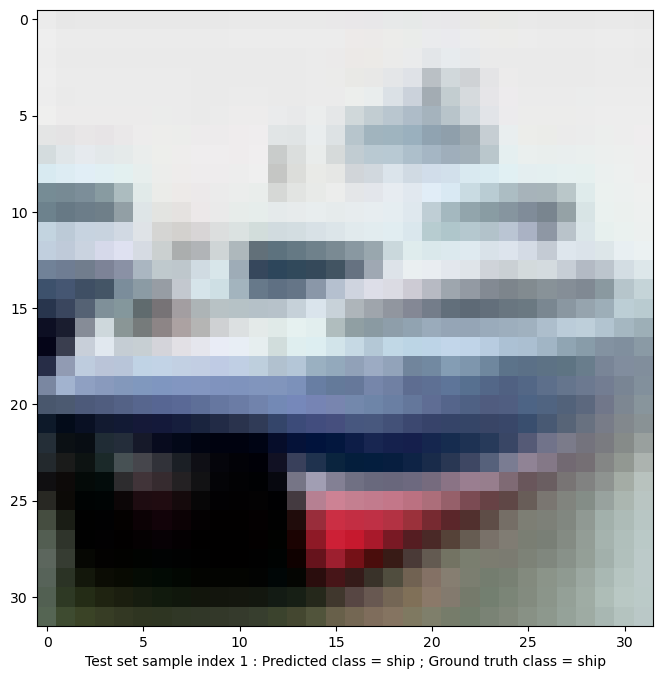

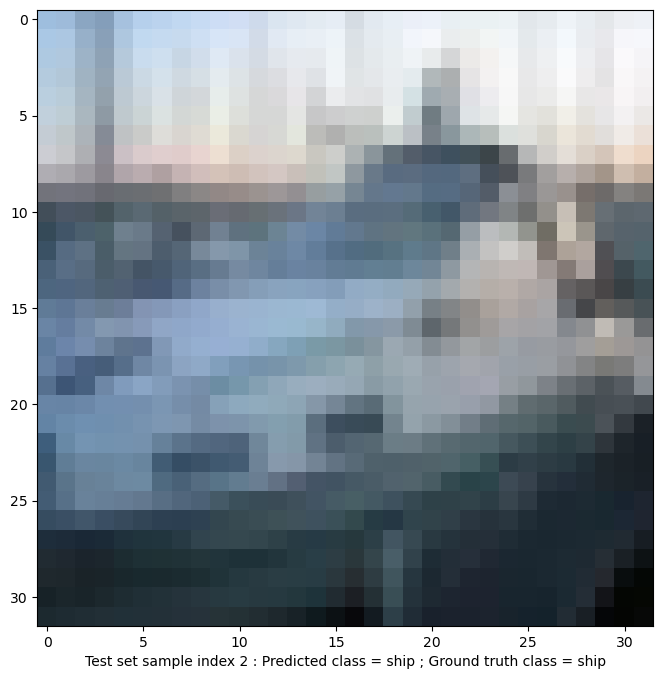

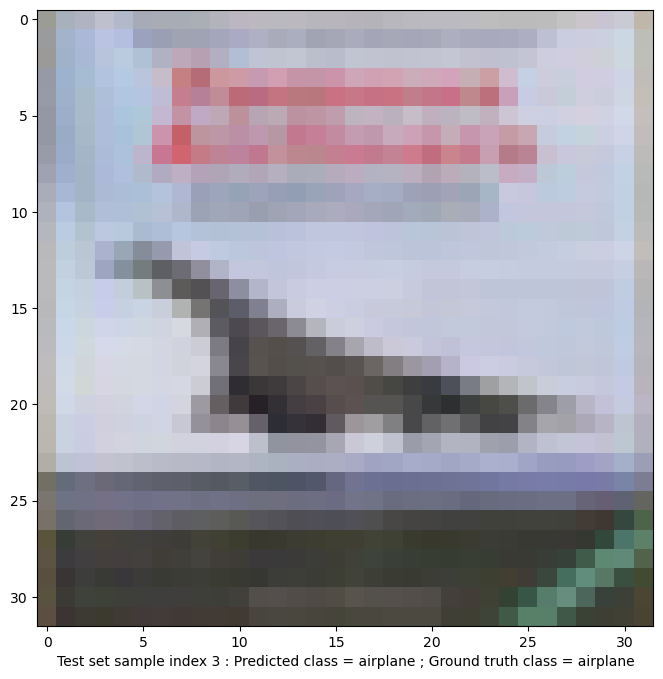

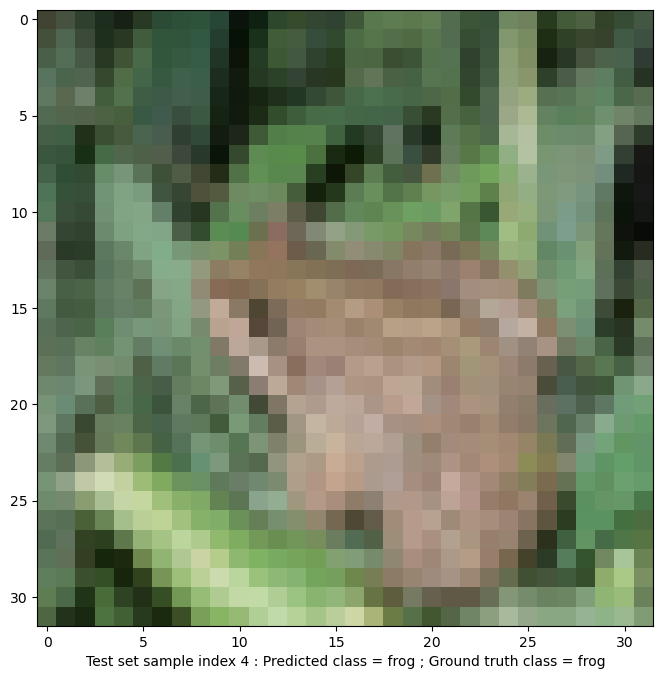

In [34]:
# Compare the predicted results of the neural network (the model_name you provide) with the corresponding ground truth
plot_predicted(cnn, X_test_scaled, X_test, Y_test)